## **Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset**

---

**Exercise 1: Data Exploration and Preprocessing**

1. Load and Explore the Data

In [1]:
import pandas as pd

df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
print(df.head(10))
print(df.isnull().sum())
print(df.describe)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

Task: **Summarize the datase**

In [2]:
print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')
print(df.isnull().sum())

Instances: 569, Features: 33
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

2. Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler

df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

3. Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

**Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model**

1. Train the KNN Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


2. Experiment with Different n_neighbors

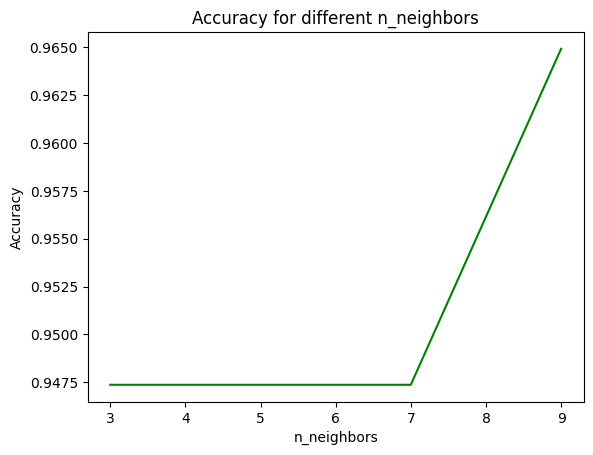

In [6]:
import matplotlib.pyplot as plt

neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Change the color of the plot
plt.plot(neighbors, accuracies, color='green')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()

**Exercise 3: Implementing Logistic Regression**

1. Train Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train, y_train)

y_pred_lr = logreg.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



2. Comparison of KNN and Logistic Regression

Compare their accuracy, precision, and F1-score based on the classfication report.
- The classification report shows that the model has a high overall accuracy of approximately 97%. For class ‘0’, the precision is 0.97, recall is 0.99, and F1-score is 0.98, indicating excellent performance with very few false positives and false negatives. For class ‘1’, the precision is 0.98, recall is 0.95, and F1-score is 0.96, which also reflects strong performance but with a slightly lower recall compared to class ‘0’. Overall, the model performs well in distinguishing between the two classes, maintaining high precision and balanced F1-scores.

**Exercise 4: Hyperparameter Tuning and Cross-Validation**

1. GridSearchCV for KNN

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


2. Cross-Validation for Logistic Regression

In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


**Exercise 5: Decision Boundary Visualization**

1. Use PCA for Dimensionality Reduction

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_features)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_pca, df['diagnosis'])

logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(x_pca, df['diagnosis'])

LogisticRegression(max_iter=10000)

Task: Plot the Decision Boundary:


You can use matplotlib or similar libraries to plot the decision boundaries.

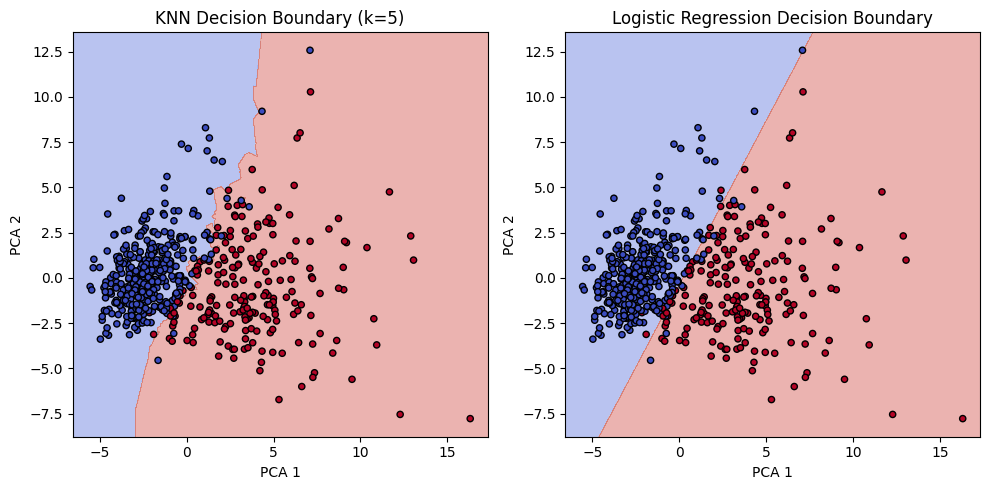

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_features)

x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_pca, df['diagnosis'])

Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_knn, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['diagnosis'], edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_pca, df['diagnosis'])

Z_logreg = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_logreg, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['diagnosis'], edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()